## 2. Standard Convolution (CIFAR-10)

In [1]:
from keras.layers import BatchNormalization, DepthwiseConv2D, ReLU, Conv2D

In [2]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [3]:
import tensorflow as tf
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, Adam, Nadam
import matplotlib.pyplot as plt

In [4]:
def Conv_block(x, f, s=1):
    """
    construct a standard convolutional layer with Batch Normalization and ReLU
    :x : shape of the input (height, width, channels)
    :f : number of filters
    :s : stride of the convolution
    return the convolution block with multiple layers
    """
    x = Conv2D(filters=f, kernel_size=3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [5]:

def CNN(input_shape, n_classes):  
    input_1 = Input(input_shape)

    x = Conv2D(32, 3, strides=2, padding='same')(input_1)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv_block(x, 64)
    x = Conv_block(x, 128, 2)
    x = Conv_block(x, 128)

    x = Conv_block(x, 256, 2)
    x = Conv_block(x, 256)

    x = Conv_block(x, 512, 2)
    for _ in range(5):
        x = Conv_block(x, 512)

    x = Conv_block(x, 1024, 2)
    x = Conv_block(x, 1024)
  
    x = GlobalAvgPool2D()(x)
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input_1, output)
    return model

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
x_train.shape, y_train.shape

170498071/170498071 [==============================] - 14s 0us/step


((50000, 32, 32, 3), (50000, 10))

In [7]:
model = CNN(x_train.shape[1:],10)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1250/1250 [==============================] - 31s 15ms/step - loss: 2.0816 - accuracy: 0.2100 - val_loss: 3.3429 - val_accuracy: 0.2096
Epoch 2/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8216 - accuracy: 0.3186 - val_loss: 2.2998 - val_accuracy: 0.2416
Epoch 3/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.6670 - accuracy: 0.4001 - val_loss: 3.0134 - val_accuracy: 0.3905
Epoch 4/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5077 - accuracy: 0.4773 - val_loss: 1.4297 - val_accuracy: 0.4723
Epoch 5/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3483 - accuracy: 0.5329 - val_loss: 3.3422 - val_accuracy: 0.4503
Epoch 6/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2146 - accuracy: 0.5828 - val_loss: 1.2933 - val_accuracy: 0.5554
Epoch 7/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.1052 - accuracy: 0.6256 - val_loss: 1.0669 -

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                             

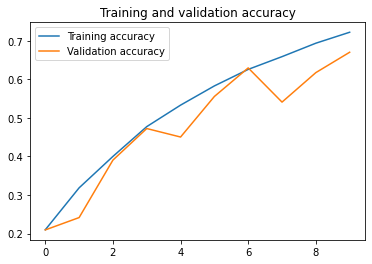

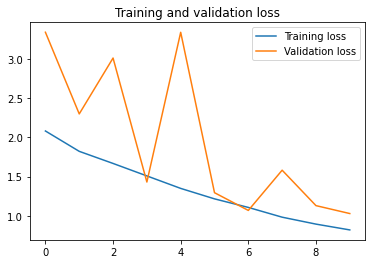

In [9]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save('CIFAR_CNN.h5')